# Exploratory Data Analysis Guide

https://towardsdatascience.com/11-simple-code-blocks-for-complete-exploratory-data-analysis-eda-67c2817f56cd

In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [5]:
data = pd.read_csv('data/melb_data.csv')

## 1. Shape

In [8]:
data.shape

(13580, 21)

## 2. Data types

We have to look for [variables definitions](https://datawrapper.dwcdn.net/hHuXG/4/). After understanding the data, we should look for numeric features that should be categorical and vice versa.

In [7]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

## 3. Display a few rows

What to look out for:
- Can you understand the column names? Do they make sense?
- Do the values in these columns make sense?
- Are there significant missing values (NaN) sighted?
- What types of classes do the categorical features have?

In [9]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [11]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [12]:
data.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5028,Preston,171 Tyler St,4,h,750000.0,PI,Barry,30/07/2016,8.8,3072.0,3.0,2.0,2.0,500.0,150.0,1950.0,Darebin,-37.73200,145.0209,Northern Metropolitan,14577.0
5616,South Yarra,9/372 Toorak Rd,1,u,411000.0,S,hockingstuart,8/10/2016,3.3,3141.0,1.0,1.0,1.0,1369.0,NaN,NaN,Stonnington,-37.84050,145.0025,Southern Metropolitan,14887.0
4473,Northcote,43 Andrew St,4,h,2004000.0,S,Jellis,24/09/2016,5.5,3070.0,3.0,2.0,1.0,569.0,NaN,NaN,Darebin,-37.77200,145.0039,Northern Metropolitan,11364.0
9096,Chelsea,30 Mulkarra Dr,3,h,840000.0,S,Ray,3/06/2017,27.0,3196.0,3.0,2.0,2.0,534.0,126.0,1975.0,Kingston,-38.04683,145.1261,South-Eastern Metropolitan,3906.0
4757,Port Melbourne,9 The Cove,3,h,1570000.0,S,Biggin,17/09/2016,3.8,3207.0,3.0,2.0,1.0,210.0,211.0,1999.0,Port Phillip,-37.83820,144.9272,Southern Metropolitan,8648.0


## 4. Numerical Features Distribution

What to look out for:
- Possible outliers that cannot be explained or might be measurement errors
- Numeric features that should be categorical. For example, Gender represented by 1 and 0.
- Boundaries that do not make sense such as percentage values> 100.

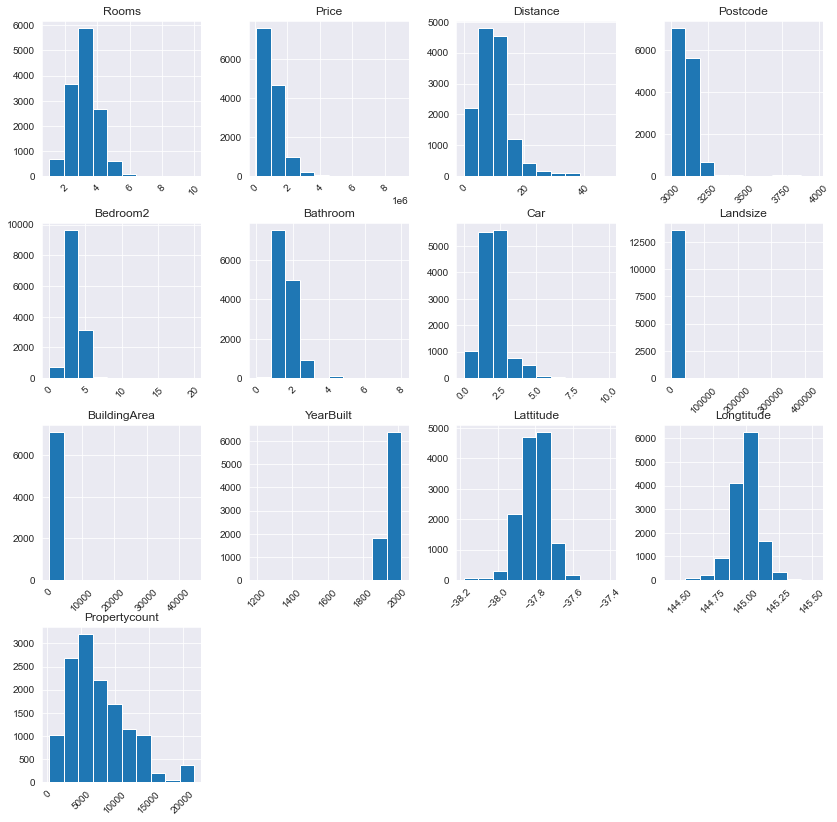

In [13]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

In [14]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## 5. Categorical features

What to look out for:
- Sparse classes which have the potential to affect a model’s performance.
- Mistakes in labeling of the classes, for example 2 exact classes with minor spelling differences.

In [15]:
data.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,5 Charles St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


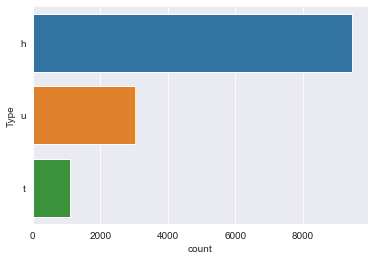

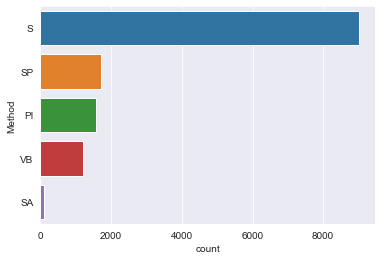

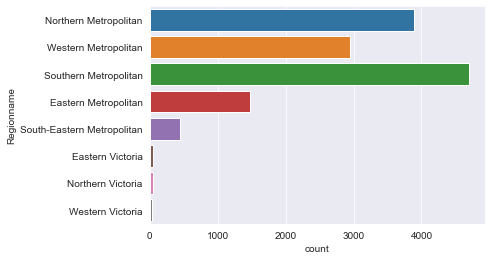

In [16]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column, data=data)
        plt.show()

### 6. Segment the target variable by categorical features

What to look out for:
- Which classes most affect the target variables.

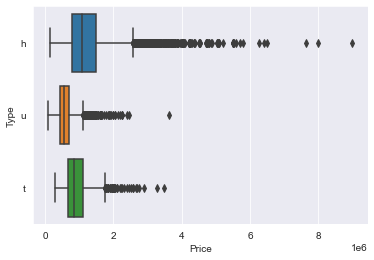

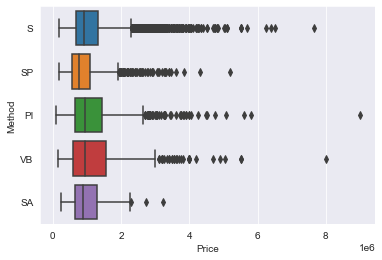

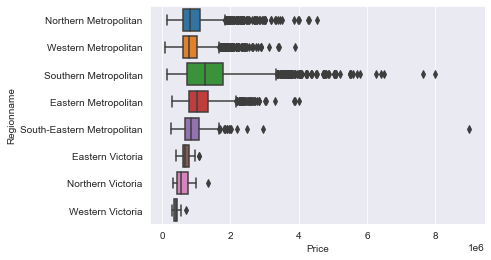

In [19]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.boxplot(y=column, x='Price', data=data)
        plt.show()

### 7. Group numeric features by each categorical feature

In [20]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        display(data.groupby(column).mean())

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Type,,,,,,,,,,,,,
h,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.771222,617.181924,176.866248,1954.081176,-37.803795,144.994700,7259.025505
t,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,140.046323,1998.988189,-37.815782,144.996489,7094.459605
u,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128358,477.314219,80.737121,1980.016708,-37.823710,144.996363,8199.280080


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Method,,,,,,,,,,,,,
PI,3.077366,1.133242e+06,9.482097,3106.742327,3.062660,1.714194,1.703918,521.682864,158.783107,1965.621106,-37.814429,145.001865,7749.644501
S,2.941809,1.087327e+06,10.431523,3106.171359,2.914875,1.498781,1.602581,531.129905,155.781647,1963.382091,-37.808204,144.997012,7496.049435
SA,3.010870,1.025772e+06,12.385870,3132.304348,3.010870,1.554348,1.769231,699.532609,151.454318,1979.340000,-37.818112,145.023262,6945.902174
SP,2.795655,8.998924e+05,10.374692,3096.480916,2.785672,1.456254,1.560472,469.346447,128.631366,1968.742958,-37.804809,144.972983,7093.759248
VB,2.924103,1.166510e+06,8.273728,3107.337781,2.896580,1.675563,1.602359,927.331943,152.419093,1965.464807,-37.815460,145.002459,7307.331943


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,
Eastern Metropolitan,3.322230,1.104080e+06,13.901088,3111.162475,3.313392,1.698844,1.792916,634.133923,178.001521,1971.859903,-37.788820,145.129184,5713.788579
Eastern Victoria,3.396226,6.999808e+05,34.209434,3567.584906,3.396226,1.811321,2.056604,2949.698113,183.645000,1984.032258,-37.959292,145.324428,8872.358491
Northern Metropolitan,2.755527,8.981711e+05,8.078329,3071.360925,2.734190,1.367866,1.454123,568.948072,124.177723,1962.764286,-37.747258,144.981176,9485.602057
Northern Victoria,3.560976,5.948293e+05,33.748780,3418.707317,3.560976,1.853659,1.925000,3355.463415,1746.374286,1986.666667,-37.599620,144.838486,4260.975610
South-Eastern Metropolitan,3.360000,9.229438e+05,23.813556,3225.255556,3.355556,1.657778,2.044444,613.991111,162.734296,1976.859504,-37.993727,145.145865,6589.366667
Southern Metropolitan,2.860916,1.372963e+06,8.756656,3156.714590,2.835144,1.624068,1.576264,509.252183,153.580962,1960.523777,-37.866981,145.034312,7622.279233
Western Metropolitan,3.023406,8.664205e+05,10.104579,3031.781208,2.990502,1.501018,1.696392,493.606852,144.697623,1968.155192,-37.782382,144.862512,5561.785957
Western Victoria,3.406250,3.975234e+05,30.753125,3337.687500,3.406250,1.468750,1.843750,655.500000,134.683810,1982.565217,-37.695163,144.569906,4191.156250


### 8. Correlations matrix for numerical features

What to look out for:
- Strongly correlated features; either dark red (positive) or dark blue(negative).
- Target variable; If it has strong positive or negative relationships with other features.

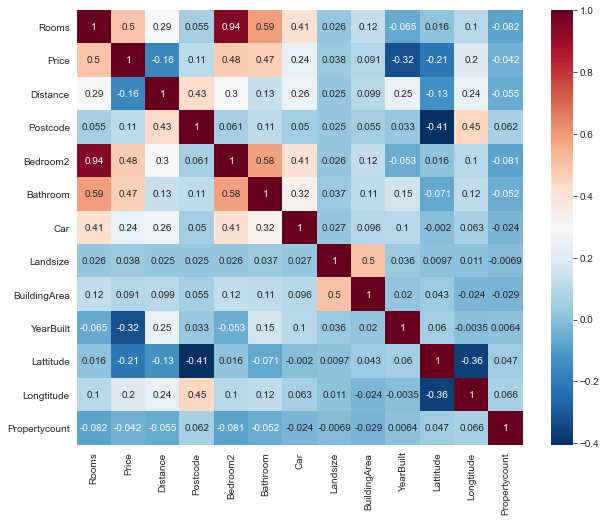

In [22]:
corrs = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()